## New York Crime data analysis in the year 2024

### Import libraries

In [1031]:
# Importing the libraries
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt # plotting library
import seaborn as sns # visualization library
import plotly.express as px # for interactive plots
import folium # for heatmaps
from folium.plugins import HeatMap # for heatmaps
import random # for random sampling

In [1032]:
# Importing ML libraries for the model
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV # for splitting the data and cross validation
from sklearn.ensemble import RandomForestClassifier # for the random forest model
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder # for feature scaling
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score # for model evaluation
from sklearn.pipeline import make_pipeline # for creating a pipeline
from sklearn.linear_model import LogisticRegression # for the logistic regression model
import joblib # for saving the model

# Set visualization aesthetics
sns.set(style='whitegrid') # set the background for the plots

## Load and preview data

In [1033]:
# Load the dataset
file_path = 'Resources/NYPD_Complaint_Data_Current__Year_To_Date__20240920.csv'
nypd_df = pd.read_csv(file_path, low_memory=False)

#Display the first few rows of the dataframe
nypd_df.head()

CMPLNT_NUM  ADDR_PCT_CD        BORO_NM CMPLNT_FR_DT CMPLNT_FR_TM  \
0  280510523           14      MANHATTAN   01/11/2024     04:00:00   
1  286736978          122  STATEN ISLAND   01/01/2015     13:00:00   
2  289019347            1      MANHATTAN   06/20/2024     16:12:00   
3  283688417          121  STATEN ISLAND   03/11/2024     10:00:00   
4  280934552          122  STATEN ISLAND   11/14/2023     12:00:00   

  CMPLNT_TO_DT CMPLNT_TO_TM CRM_ATPT_CPTD_CD HADEVELOPT  HOUSING_PSA  ...  \
0          NaN       (null)        COMPLETED     (null)          NaN  ...   
1   01/01/2015     15:00:00        COMPLETED     (null)          NaN  ...   
2   06/20/2024     16:13:00        COMPLETED     (null)          NaN  ...   
3   03/13/2024     13:20:00        COMPLETED     (null)          NaN  ...   
4   11/17/2023     12:00:00        COMPLETED     (null)          NaN  ...   

   TRANSIT_DISTRICT VIC_AGE_GROUP  VIC_RACE VIC_SEX X_COORD_CD Y_COORD_CD  \
0               NaN         18-24     BLACK       F   985764.0   213806.0   
1               NaN         25-44   UNKNOWN       F   954827.0   148519.0   
2               2.0         25-44     BLACK       F   982466.0   197787.0   
3               NaN         25-44     BLACK       F   938414.0   170500.0   
4               NaN           65+     WHITE       M   941085.0   135276.0   

    Latitude  Longitude                                  Lat_Lon  \
0  40.753533 -73.994537    (40.7535327012632, -73.9945368920152)   
1  40.574286 -74.105914    (40.5742856881925, -74.1059144051212)   
2  40.709556 -74.006435  (40.70955616028041, -74.00643483276845)   
3  40.634542 -74.165142                  (40.634542, -74.165142)   
4  40.537874 -74.155293                  (40.537874, -74.155293)   

                       New Georeferenced Column  
0    POINT (-73.9945368920152 40.7535327012632)  
1    POINT (-74.1059144051212 40.5742856881925)  
2  POINT (-74.00643483276845 40.70955616028041)  
3                  POINT (-74.165142 40.634542)  
4                  POINT (-74.155293 40.537874)  

[5 rows x 36 columns]

---

## Explore the data
- Shape 
- Total number of columns 
- Data info
- Total missing values 
- Summary statistics

In [1034]:
# SHAPE - 

# Check the size of the dataset
print("Dataset shape:", nypd_df.shape)

Dataset shape: (282069, 36)


In [1035]:
# COLUMNS - 

# Display all the column names
print("Column names:", nypd_df.columns)

Column names: Index(['CMPLNT_NUM', 'ADDR_PCT_CD', 'BORO_NM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM',
       'CMPLNT_TO_DT', 'CMPLNT_TO_TM', 'CRM_ATPT_CPTD_CD', 'HADEVELOPT',
       'HOUSING_PSA', 'JURISDICTION_CODE', 'JURIS_DESC', 'KY_CD', 'LAW_CAT_CD',
       'LOC_OF_OCCUR_DESC', 'OFNS_DESC', 'PARKS_NM', 'PATROL_BORO', 'PD_CD',
       'PD_DESC', 'PREM_TYP_DESC', 'RPT_DT', 'STATION_NAME', 'SUSP_AGE_GROUP',
       'SUSP_RACE', 'SUSP_SEX', 'TRANSIT_DISTRICT', 'VIC_AGE_GROUP',
       'VIC_RACE', 'VIC_SEX', 'X_COORD_CD', 'Y_COORD_CD', 'Latitude',
       'Longitude', 'Lat_Lon', 'New Georeferenced Column'],
      dtype='object')


In [1036]:
# INFO - 

# Get basic info about the dataset (data types, non-null values)
print(nypd_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282069 entries, 0 to 282068
Data columns (total 36 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   CMPLNT_NUM                282069 non-null  object 
 1   ADDR_PCT_CD               282069 non-null  int64  
 2   BORO_NM                   282069 non-null  object 
 3   CMPLNT_FR_DT              282069 non-null  object 
 4   CMPLNT_FR_TM              282069 non-null  object 
 5   CMPLNT_TO_DT              267186 non-null  object 
 6   CMPLNT_TO_TM              282069 non-null  object 
 7   CRM_ATPT_CPTD_CD          282069 non-null  object 
 8   HADEVELOPT                282069 non-null  object 
 9   HOUSING_PSA               17650 non-null   float64
 10  JURISDICTION_CODE         282069 non-null  int64  
 11  JURIS_DESC                282069 non-null  object 
 12  KY_CD                     282069 non-null  int64  
 13  LAW_CAT_CD                282069 non-null  o

In [1037]:
# TOTAL MISSING VALUES - 

# Check for missing values in each column
missing_values = nypd_df.isnull().sum()

# Print missing values with header
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
CMPLNT_NUM                       0
ADDR_PCT_CD                      0
BORO_NM                          0
CMPLNT_FR_DT                     0
CMPLNT_FR_TM                     0
CMPLNT_TO_DT                 14883
CMPLNT_TO_TM                     0
CRM_ATPT_CPTD_CD                 0
HADEVELOPT                       0
HOUSING_PSA                 264419
JURISDICTION_CODE                0
JURIS_DESC                       0
KY_CD                            0
LAW_CAT_CD                       0
LOC_OF_OCCUR_DESC                0
OFNS_DESC                        0
PARKS_NM                         0
PATROL_BORO                      0
PD_CD                          172
PD_DESC                          0
PREM_TYP_DESC                    0
RPT_DT                           0
STATION_NAME                     0
SUSP_AGE_GROUP                   0
SUSP_RACE                        0
SUSP_SEX                         0
TRANSIT_DISTRICT            269621
VIC_AGE_GROUP           

---

## Transform and clean the data 
- Rename all the columns for better understanding
- Drop unnecessary columns
- Datetime conversion 
    - Create new columns YEAR, MONTH, WEEKDAY, HOUR from, complaint from date & time columns
- Transform the columns  
    - Law category code column - Add severity level for better understanding
    - Offense description column - Divide 63 unique values into different type of crimes 
    - Clean year, suspect and victim demographics columns because of insufficient, incorrect data
- Drop missing, null, error values in all the columns


In [1038]:
# FULL NAMES OF COLUMNS - 

# Create a dictionary to map the short column names to their full names
column_rename = {
    'CMPLNT_NUM': 'COMPLAINT_NUMBER',
    'ADDR_PCT_CD': 'ADDRESS_PRECINCT_CODE',
    'BORO_NM': 'BOROUGH_NAME',
    'CMPLNT_FR_DT': 'COMPLAINT_FROM_DATE',
    'CMPLNT_FR_TM': 'COMPLAINT_FROM_TIME',
    'CMPLNT_TO_DT': 'COMPLAINT_TO_DATE',
    'CMPLNT_TO_TM': 'COMPLAINT_TO_TIME',
    'CRM_ATPT_CPTD_CD': 'CRIME_ATTEMPT_COMPLETED_CODE',
    'HADEVELOPT': 'HOUSING_DEVELOPMENT',
    'HOUSING_PSA': 'HOUSING_PSA',
    'JURISDICTION_CODE': 'JURISDICTION_CODE',
    'JURIS_DESC': 'JURISDICTION_DESCRIPTION',
    'KY_CD': 'KEY_CODE',
    'LAW_CAT_CD': 'LAW_CATEGORY_CODE',
    'LOC_OF_OCCUR_DESC': 'LOCATION_OF_OCCURRENCE_DESCRIPTION',
    'OFNS_DESC': 'OFFENSE_DESCRIPTION',
    'PARKS_NM': 'PARKS_NAME',
    'PATROL_BORO': 'PATROL_BOROUGH',
    'PD_CD': 'POLICE_DEPARTMENT_CODE',
    'PD_DESC': 'POLICE_DEPARTMENT_DESCRIPTION',
    'PREM_TYP_DESC': 'PREMISES_TYPE_DESCRIPTION',
    'RPT_DT': 'REPORT_DATE',
    'STATION_NAME': 'STATION_NAME',
    'SUSP_AGE_GROUP': 'SUSPECT_AGE_GROUP',
    'SUSP_RACE': 'SUSPECT_RACE',
    'SUSP_SEX': 'SUSPECT_SEX',
    'TRANSIT_DISTRICT': 'TRANSIT_DISTRICT',
    'VIC_AGE_GROUP': 'VICTIM_AGE_GROUP',
    'VIC_RACE': 'VICTIM_RACE',
    'VIC_SEX': 'VICTIM_SEX',
    'X_COORD_CD': 'X_COORDINATE',
    'Y_COORD_CD': 'Y_COORDINATE',
    'Latitude': 'LATITUDE',
    'Longitude': 'LONGITUDE',
    'Lat_Lon': 'LAT_LON',
    'New Georeferenced Column': 'New_Georeferenced_Column'
}

# Rename the columns using the dictionary
df_renamed = nypd_df.rename(columns=column_rename)

df_renamed.head()


COMPLAINT_NUMBER  ADDRESS_PRECINCT_CODE   BOROUGH_NAME COMPLAINT_FROM_DATE  \
0        280510523                     14      MANHATTAN          01/11/2024   
1        286736978                    122  STATEN ISLAND          01/01/2015   
2        289019347                      1      MANHATTAN          06/20/2024   
3        283688417                    121  STATEN ISLAND          03/11/2024   
4        280934552                    122  STATEN ISLAND          11/14/2023   

  COMPLAINT_FROM_TIME COMPLAINT_TO_DATE COMPLAINT_TO_TIME  \
0            04:00:00               NaN            (null)   
1            13:00:00        01/01/2015          15:00:00   
2            16:12:00        06/20/2024          16:13:00   
3            10:00:00        03/13/2024          13:20:00   
4            12:00:00        11/17/2023          12:00:00   

  CRIME_ATTEMPT_COMPLETED_CODE HOUSING_DEVELOPMENT  HOUSING_PSA  ...  \
0                    COMPLETED              (null)          NaN  ...   
1                    COMPLETED              (null)          NaN  ...   
2                    COMPLETED              (null)          NaN  ...   
3                    COMPLETED              (null)          NaN  ...   
4                    COMPLETED              (null)          NaN  ...   

   TRANSIT_DISTRICT VICTIM_AGE_GROUP  VICTIM_RACE VICTIM_SEX X_COORDINATE  \
0               NaN            18-24        BLACK          F     985764.0   
1               NaN            25-44      UNKNOWN          F     954827.0   
2               2.0            25-44        BLACK          F     982466.0   
3               NaN            25-44        BLACK          F     938414.0   
4               NaN              65+        WHITE          M     941085.0   

  Y_COORDINATE   LATITUDE  LONGITUDE                                  LAT_LON  \
0     213806.0  40.753533 -73.994537    (40.7535327012632, -73.9945368920152)   
1     148519.0  40.574286 -74.105914    (40.5742856881925, -74.1059144051212)   
2     197787.0  40.709556 -74.006435  (40.70955616028041, -74.00643483276845)   
3     170500.0  40.634542 -74.165142                  (40.634542, -74.165142)   
4     135276.0  40.537874 -74.155293                  (40.537874, -74.155293)   

                       New_Georeferenced_Column  
0    POINT (-73.9945368920152 40.7535327012632)  
1    POINT (-74.1059144051212 40.5742856881925)  
2  POINT (-74.00643483276845 40.70955616028041)  
3                  POINT (-74.165142 40.634542)  
4                  POINT (-74.155293 40.537874)  

[5 rows x 36 columns]

In [1039]:
# DROP UNNECESSARY COLUMNS - 

# Drop irrelevant columns based on initial exploration
nypd_df_cleaned = df_renamed.drop(columns=[
    # 'COMPLAINT_NUMBER',
    # 'ADDRESS_PRECINCT_CODE',
    'COMPLAINT_TO_DATE', 
    'COMPLAINT_TO_TIME',
    # 'CRIME_ATTEMPT_COMPLETED_CODE', 
    'HOUSING_DEVELOPMENT', 
    'HOUSING_PSA', 
    # 'JURISDICTION_CODE', 
    # 'JURISDICTION_DESCRIPTION', 
    'KEY_CODE', 
    'LOCATION_OF_OCCURRENCE_DESCRIPTION',
    'PARKS_NAME',
    # 'OFFENSE_DESCRIPTION',
    # 'PATROL_BOROUGH',
    'POLICE_DEPARTMENT_CODE',
    'POLICE_DEPARTMENT_DESCRIPTION',
    'PREMISES_TYPE_DESCRIPTION',
    # 'REPORT_DATE',
    'STATION_NAME', 
    'TRANSIT_DISTRICT', 
    'X_COORDINATE',
    'Y_COORDINATE',
    'LAT_LON',
    'New_Georeferenced_Column'
])
nypd_df_cleaned.head()

# nypd_df_cleaned = df_renamed.copy()

COMPLAINT_NUMBER  ADDRESS_PRECINCT_CODE   BOROUGH_NAME COMPLAINT_FROM_DATE  \
0        280510523                     14      MANHATTAN          01/11/2024   
1        286736978                    122  STATEN ISLAND          01/01/2015   
2        289019347                      1      MANHATTAN          06/20/2024   
3        283688417                    121  STATEN ISLAND          03/11/2024   
4        280934552                    122  STATEN ISLAND          11/14/2023   

  COMPLAINT_FROM_TIME CRIME_ATTEMPT_COMPLETED_CODE  JURISDICTION_CODE  \
0            04:00:00                    COMPLETED                  0   
1            13:00:00                    COMPLETED                  0   
2            16:12:00                    COMPLETED                  1   
3            10:00:00                    COMPLETED                  0   
4            12:00:00                    COMPLETED                  0   

  JURISDICTION_DESCRIPTION LAW_CATEGORY_CODE OFFENSE_DESCRIPTION  \
0         N.Y. POLICE DEPT            FELONY                RAPE   
1         N.Y. POLICE DEPT       MISDEMEANOR          SEX CRIMES   
2      N.Y. TRANSIT POLICE         VIOLATION       HARRASSMENT 2   
3         N.Y. POLICE DEPT       MISDEMEANOR       PETIT LARCENY   
4         N.Y. POLICE DEPT            FELONY       GRAND LARCENY   

              PATROL_BOROUGH REPORT_DATE SUSPECT_AGE_GROUP SUSPECT_RACE  \
0      PATROL BORO MAN SOUTH  01/14/2024             18-24        BLACK   
1  PATROL BORO STATEN ISLAND  05/11/2024             25-44      UNKNOWN   
2      PATROL BORO MAN SOUTH  06/20/2024             45-64        BLACK   
3  PATROL BORO STATEN ISLAND  03/13/2024            (null)       (null)   
4  PATROL BORO STATEN ISLAND  01/22/2024            (null)       (null)   

  SUSPECT_SEX VICTIM_AGE_GROUP VICTIM_RACE VICTIM_SEX   LATITUDE  LONGITUDE  
0           U            18-24       BLACK          F  40.753533 -73.994537  
1           M            25-44     UNKNOWN          F  40.574286 -74.105914  
2           M            25-44       BLACK          F  40.709556 -74.006435  
3      (null)            25-44       BLACK          F  40.634542 -74.165142  
4      (null)              65+       WHITE          M  40.537874 -74.155293

In [1040]:
# REMAINING COLUMNS - 

# Display all the column names
print("Column names:", nypd_df_cleaned.columns)

Column names: Index(['COMPLAINT_NUMBER', 'ADDRESS_PRECINCT_CODE', 'BOROUGH_NAME',
       'COMPLAINT_FROM_DATE', 'COMPLAINT_FROM_TIME',
       'CRIME_ATTEMPT_COMPLETED_CODE', 'JURISDICTION_CODE',
       'JURISDICTION_DESCRIPTION', 'LAW_CATEGORY_CODE', 'OFFENSE_DESCRIPTION',
       'PATROL_BOROUGH', 'REPORT_DATE', 'SUSPECT_AGE_GROUP', 'SUSPECT_RACE',
       'SUSPECT_SEX', 'VICTIM_AGE_GROUP', 'VICTIM_RACE', 'VICTIM_SEX',
       'LATITUDE', 'LONGITUDE'],
      dtype='object')


In [1041]:
# CONVERT TO DATETIME FORMAT - 

# Convert 'COMPLAINT_FROM_DATE' to datetime format
nypd_df_cleaned['COMPLAINT_FROM_DATE'] = pd.to_datetime(nypd_df_cleaned['COMPLAINT_FROM_DATE'], errors='coerce')

# Convert 'COMPLAINT_FROM_TIME' to datetime.time format
nypd_df_cleaned['COMPLAINT_FROM_TIME'] = pd.to_datetime(nypd_df_cleaned['COMPLAINT_FROM_TIME'], format='%H:%M:%S', errors='coerce').dt.time

# COMBINE INTO ONE COLUMN - 

# Combine 'COMPLAINT_FROM_DATE' and 'COMPLAINT_FROM_TIME' into a single datetime column
nypd_df_cleaned['COMPLAINT_DATETIME'] = pd.to_datetime(nypd_df_cleaned['COMPLAINT_FROM_DATE'].astype(str) + ' ' + nypd_df_cleaned['COMPLAINT_FROM_TIME'].astype(str), errors='coerce')


# Extract year, month, week (days), and hour directly from this datetime field
nypd_df_cleaned['YEAR'] = nypd_df_cleaned['COMPLAINT_DATETIME'].dt.year.astype('Int64')
nypd_df_cleaned['MONTH'] = nypd_df_cleaned['COMPLAINT_DATETIME'].dt.month.astype('Int64')
nypd_df_cleaned['WEEKDAY'] = nypd_df_cleaned['COMPLAINT_DATETIME'].dt.day_name()
nypd_df_cleaned['HOUR'] = nypd_df_cleaned['COMPLAINT_DATETIME'].dt.hour.astype('Int64')

# Drop the original 'COMPLAINT_FROM_DATE' and 'COMPLAINT_FROM_TIME' columns to keep only the combined datetime
nypd_df_cleaned.drop(['COMPLAINT_FROM_DATE', 'COMPLAINT_FROM_TIME', 'COMPLAINT_DATETIME'], axis=1, inplace=True)

# Display the updated dataframe with the new 'COMPLAINT_DATETIME' column
print(nypd_df_cleaned[['YEAR', 'MONTH', 'WEEKDAY', 'HOUR']].head())

   YEAR  MONTH   WEEKDAY  HOUR
0  2024      1  Thursday     4
1  2015      1  Thursday    13
2  2024      6  Thursday    16
3  2024      3    Monday    10
4  2023     11   Tuesday    12


In [1042]:
# Display clean data after dropping irrelevant columns
nypd_df_cleaned.head()

COMPLAINT_NUMBER  ADDRESS_PRECINCT_CODE   BOROUGH_NAME  \
0        280510523                     14      MANHATTAN   
1        286736978                    122  STATEN ISLAND   
2        289019347                      1      MANHATTAN   
3        283688417                    121  STATEN ISLAND   
4        280934552                    122  STATEN ISLAND   

  CRIME_ATTEMPT_COMPLETED_CODE  JURISDICTION_CODE JURISDICTION_DESCRIPTION  \
0                    COMPLETED                  0         N.Y. POLICE DEPT   
1                    COMPLETED                  0         N.Y. POLICE DEPT   
2                    COMPLETED                  1      N.Y. TRANSIT POLICE   
3                    COMPLETED                  0         N.Y. POLICE DEPT   
4                    COMPLETED                  0         N.Y. POLICE DEPT   

  LAW_CATEGORY_CODE OFFENSE_DESCRIPTION             PATROL_BOROUGH  \
0            FELONY                RAPE      PATROL BORO MAN SOUTH   
1       MISDEMEANOR          SEX CRIMES  PATROL BORO STATEN ISLAND   
2         VIOLATION       HARRASSMENT 2      PATROL BORO MAN SOUTH   
3       MISDEMEANOR       PETIT LARCENY  PATROL BORO STATEN ISLAND   
4            FELONY       GRAND LARCENY  PATROL BORO STATEN ISLAND   

  REPORT_DATE  ... SUSPECT_SEX VICTIM_AGE_GROUP VICTIM_RACE VICTIM_SEX  \
0  01/14/2024  ...           U            18-24       BLACK          F   
1  05/11/2024  ...           M            25-44     UNKNOWN          F   
2  06/20/2024  ...           M            25-44       BLACK          F   
3  03/13/2024  ...      (null)            25-44       BLACK          F   
4  01/22/2024  ...      (null)              65+       WHITE          M   

    LATITUDE  LONGITUDE  YEAR  MONTH   WEEKDAY  HOUR  
0  40.753533 -73.994537  2024      1  Thursday     4  
1  40.574286 -74.105914  2015      1  Thursday    13  
2  40.709556 -74.006435  2024      6  Thursday    16  
3  40.634542 -74.165142  2024      3    Monday    10  
4  40.537874 -74.155293  2023     11   Tuesday    12  

[5 rows x 22 columns]

### year column

In [1043]:
# Check the year column
nypd_df_cleaned['YEAR'].value_counts()

# Keep only the data for the year 2023 & 2024 and drop the rest
nypd_df_cleaned = nypd_df_cleaned[nypd_df_cleaned['YEAR'].isin([2024])]
nypd_df_cleaned['YEAR'].value_counts()



YEAR
2024    272601
Name: count, dtype: Int64

### law category column

In [1044]:
# Add the severity level to the values in the law category code column, example - 'FELONY (SEVERE)', 'MISDEMEANOR (MODERATE)', 'VIOLATION (MINOR)'

nypd_df_cleaned['LAW_CATEGORY_CODE'] = nypd_df_cleaned['LAW_CATEGORY_CODE'].replace({'FELONY': 'FELONY (SEVERE CRIME)', 'MISDEMEANOR': 'MISDEMEANOR (MODERATE CRIME)', 'VIOLATION': 'VIOLATION (MINOR CRIME)'})
nypd_df_cleaned['LAW_CATEGORY_CODE'].value_counts()

LAW_CATEGORY_CODE
MISDEMEANOR (MODERATE CRIME)    142298
FELONY (SEVERE CRIME)            87860
VIOLATION (MINOR CRIME)          42443
Name: count, dtype: int64

### offense description column

In [1045]:
# CHECK OFFENSE_DESCRIPTION COLUMN -

# Get unique values and their counts for the Offense_Description column
nypd_df_cleaned['OFFENSE_DESCRIPTION'].value_counts()


OFFENSE_DESCRIPTION
PETIT LARCENY                     50699
HARRASSMENT 2                     40795
ASSAULT 3 & RELATED OFFENSES      30431
GRAND LARCENY                     21512
CRIMINAL MISCHIEF & RELATED OF    19222
                                  ...  
LOITERING/GAMBLING (CARDS, DIC        3
ANTICIPATORY OFFENSES                 2
FORTUNE TELLING                       2
OTHER TRAFFIC INFRACTION              1
LOITERING                             1
Name: count, Length: 63, dtype: int64

In [1046]:
# Get the unique values from the OFFENSE_DESCRIPTION column
unique_offenses = nypd_df_cleaned['OFFENSE_DESCRIPTION'].unique()

# # Display all unique values
print(f'Total number of unique offense descriptions: {len(unique_offenses)}')
print(unique_offenses)

Total number of unique offense descriptions: 63
['RAPE' 'HARRASSMENT 2' 'PETIT LARCENY' 'CRIMINAL MISCHIEF & RELATED OF'
 'GRAND LARCENY OF MOTOR VEHICLE' 'OFF. AGNST PUB ORD SENSBLTY &'
 'VEHICLE AND TRAFFIC LAWS' 'ROBBERY' 'GRAND LARCENY'
 'CANNABIS RELATED OFFENSES' 'FELONY ASSAULT'
 'NYS LAWS-UNCLASSIFIED FELONY' 'OFFENSES INVOLVING FRAUD'
 'INTOXICATED & IMPAIRED DRIVING' 'GAMBLING'
 'ASSAULT 3 & RELATED OFFENSES' 'DISORDERLY CONDUCT'
 'OFFENSES AGAINST PUBLIC ADMINI' 'BURGLARY' 'DANGEROUS DRUGS'
 'POSSESSION OF STOLEN PROPERTY' 'OFFENSES AGAINST PUBLIC SAFETY' 'FRAUDS'
 'CRIMINAL TRESPASS' 'THEFT-FRAUD' 'MISCELLANEOUS PENAL LAW'
 'UNAUTHORIZED USE OF A VEHICLE' 'ARSON' 'MURDER & NON-NEGL. MANSLAUGHTER'
 'OFFENSES AGAINST THE PERSON' 'SEX CRIMES' 'DANGEROUS WEAPONS' 'FORGERY'
 'AGRICULTURE & MRKTS LAW-UNCLASSIFIED' 'OTHER STATE LAWS'
 'ADMINISTRATIVE CODE' 'OTHER STATE LAWS (NON PENAL LA'
 'KIDNAPPING & RELATED OFFENSES' 'FRAUDULENT ACCOSTING'
 'DISRUPTION OF A RELIGIOUS SERV' 'OF

In [1047]:

# Define a function to categorize offenses
def categorize_offense(description):
    description = description.upper()

    # Violent Crimes
    if description in ['RAPE', 'SEX CRIMES', 'MURDER & NON-NEGL. MANSLAUGHTER', 'FELONY ASSAULT', 
                       'ROBBERY', 'ASSAULT 3 & RELATED OFFENSES', 'KIDNAPPING & RELATED OFFENSES',
                       'FELONY SEX CRIMES', 'HOMICIDE-NEGLIGENT,UNCLASSIFIED', 'KIDNAPPING']:
        return 'VIOLENT CRIME'
    
    # Property Crimes
    elif description in ['PETIT LARCENY', 'GRAND LARCENY', 'CRIMINAL MISCHIEF & RELATED OF',
                         'GRAND LARCENY OF MOTOR VEHICLE', 'CRIMINAL TRESPASS', 'BURGLARY', 
                         'POSSESSION OF STOLEN PROPERTY', 'UNAUTHORIZED USE OF A VEHICLE', 
                         'ARSON', "BURGLAR'S TOOLS", 'PETIT LARCENY OF MOTOR VEHICLE', 'THEFT OF SERVICES']:
        return 'PROPERTY CRIME'
    
    # Drug/Alcohol-Related Crimes
    elif description in ['CANNABIS RELATED OFFENSES', 'DANGEROUS DRUGS', 
                         'INTOXICATED & IMPAIRED DRIVING', 'INTOXICATED/IMPAIRED DRIVING',
                         'ALCOHOLIC BEVERAGE CONTROL LAW']:
        return 'DRUG/ALCOHOL CRIME'
    
    # Public Order Crimes
    elif description in ['DISORDERLY CONDUCT', 'LOITERING', 'LOITERING/GAMBLING (CARDS, DIC)', 
                         'GAMBLING', 'PROSTITUTION & RELATED OFFENSES', 'JOSTLING', 
                         'DISRUPTION OF A RELIGIOUS SERV', 'FORTUNE TELLING', 'ESCAPE 3',
                         'DISORDERLY CONDUCT', 'UNLAWFUL POSS. WEAP. ON SCHOOL']:
        return 'PUBLIC ORDER CRIME'
    
    # Offenses Against Public Safety/Administration
    elif description in ['OFFENSES INVOLVING FRAUD', 'FRAUDS', 'THEFT-FRAUD', 
                         'OFFENSES AGAINST PUBLIC ADMINI', 'OFFENSES AGAINST PUBLIC SAFETY', 
                         'OFFENSES AGAINST THE PERSON', 'ADMINISTRATIVE CODE', 'FRAUDULENT ACCOSTING', 
                         'ANTICIPATORY OFFENSES', 'OFFENSES RELATED TO CHILDREN', 'CHILD ABANDONMENT/NON SUPPORT',
                         'ENDAN WELFARE INCOMP', 'OTHER OFFENSES RELATED TO THEF', 'OTHER TRAFFIC INFRACTION']:
        return 'OFFENSES AGAINST PUBLIC SAFETY/ADMINISTRATION'
    
    # Other Crimes
    else:
        return 'MISCELLANEOUS CRIME'

# Apply the categorization functions to the dataset
nypd_df_cleaned['OFFENSE_CATEGORY'] = nypd_df_cleaned['OFFENSE_DESCRIPTION'].apply(categorize_offense)

# Drop the original 'OFFENSE_DESCRIPTION' column
# nypd_df_cleaned.drop('OFFENSE_DESCRIPTION', axis=1, inplace=True)

# Display the first few rows to confirm the changes
print(nypd_df_cleaned[['OFFENSE_CATEGORY', 'LAW_CATEGORY_CODE']].head())


      OFFENSE_CATEGORY             LAW_CATEGORY_CODE
0        VIOLENT CRIME         FELONY (SEVERE CRIME)
2  MISCELLANEOUS CRIME       VIOLATION (MINOR CRIME)
3       PROPERTY CRIME  MISDEMEANOR (MODERATE CRIME)
6       PROPERTY CRIME         FELONY (SEVERE CRIME)
7       PROPERTY CRIME  MISDEMEANOR (MODERATE CRIME)


### suspect demographics columns

In [1048]:
# CHECK SUSPECT_AGE_GROUP COLUMN
nypd_df_cleaned['SUSPECT_AGE_GROUP'].value_counts()

# Define valid age groups
valid_age_groups = ['<18', '18-24', '25-44', '45-64', '65+']

# Filter the DataFrame to keep only rows where 'SUSPECT_AGE_GROUP' is in the valid age groups
nypd_df_cleaned = nypd_df_cleaned[nypd_df_cleaned['SUSPECT_AGE_GROUP'].isin(valid_age_groups)]

# Check the updated values
print(nypd_df_cleaned['SUSPECT_AGE_GROUP'].value_counts())

SUSPECT_AGE_GROUP
25-44    83057
45-64    27962
18-24    21396
<18       6328
65+       3074
Name: count, dtype: int64


In [1049]:
# CHECK SUSPECT_RACE COLUMN
nypd_df_cleaned['SUSPECT_RACE'].value_counts()

# Drop rows where 'SUSPECT_RACE' is 'UNKNOWN' or null
nypd_df_cleaned = nypd_df_cleaned[~nypd_df_cleaned['SUSPECT_RACE'].isin(['UNKNOWN'])]

# Drop rows with NaN values in 'SUSPECT_RACE' column
nypd_df_cleaned = nypd_df_cleaned.dropna(subset=['SUSPECT_RACE'])

# Check the updated values
print(nypd_df_cleaned['SUSPECT_RACE'].value_counts())


SUSPECT_RACE
BLACK                             64360
WHITE HISPANIC                    36020
WHITE                             15718
BLACK HISPANIC                    12007
ASIAN / PACIFIC ISLANDER           7972
AMERICAN INDIAN/ALASKAN NATIVE      471
Name: count, dtype: int64


In [1050]:
# CHECK SUSPECT_SEX COLUMN
nypd_df_cleaned['SUSPECT_SEX'].value_counts()

SUSPECT_SEX
M    106035
F     28584
U      1929
Name: count, dtype: int64

### victim demographics columns

In [1051]:
# CHECK VICTIM_AGE_GROUP COLUMN
nypd_df_cleaned['VICTIM_AGE_GROUP'].value_counts()

# Define valid age groups
valid_age_groups = ['<18', '18-24', '25-44', '45-64', '65+']

# Filter the DataFrame to keep only rows where 'SUSPECT_AGE_GROUP' is in the valid age groups
nypd_df_cleaned = nypd_df_cleaned[nypd_df_cleaned['VICTIM_AGE_GROUP'].isin(valid_age_groups)]

# Check the updated values
print(nypd_df_cleaned['VICTIM_AGE_GROUP'].value_counts())

VICTIM_AGE_GROUP
25-44    41285
45-64    18289
18-24    10410
<18       6165
65+       4367
Name: count, dtype: int64


In [1052]:
# CHECK VICTIM_RACE COLUMN
nypd_df_cleaned['VICTIM_RACE'].value_counts()

# Drop rows where 'VICTIM_RACE' is 'UNKNOWN' or null
nypd_df_cleaned = nypd_df_cleaned[~nypd_df_cleaned['VICTIM_RACE'].isin(['UNKNOWN'])]

# Drop rows with NaN values in 'VICTIM_RACE' column
nypd_df_cleaned = nypd_df_cleaned.dropna(subset=['VICTIM_RACE'])

# Check the updated values
print(nypd_df_cleaned['VICTIM_RACE'].value_counts())


VICTIM_RACE
BLACK                             29645
WHITE HISPANIC                    22518
WHITE                             12331
ASIAN / PACIFIC ISLANDER           7245
BLACK HISPANIC                     5340
AMERICAN INDIAN/ALASKAN NATIVE      380
Name: count, dtype: int64


In [1053]:
# CHECK VICTIM_SEX COLUMN

nypd_df_cleaned['VICTIM_SEX'].value_counts()

# Replace 'D', 'E', 'L' with 'Unknown'
nypd_df_cleaned['VICTIM_SEX'] = nypd_df_cleaned['VICTIM_SEX'].replace({'D': 'Unknown', 'E': 'Unknown', 'L': 'Unknown'})

# Check the updated values
print(nypd_df_cleaned['VICTIM_SEX'].value_counts())

VICTIM_SEX
F          46221
M          29923
Unknown     1315
Name: count, dtype: int64


### Drop missing and null values in all the columns

In [1054]:

# Step 1: Drop rows with any missing or null values across all columns
# nypd_df_cleaned.dropna(inplace=True)

# Step 2: Convert numeric columns to proper numeric format to handle errors (e.g., latitude, longitude)
nypd_df_cleaned['LATITUDE'] = pd.to_numeric(nypd_df_cleaned['LATITUDE'], errors='coerce')
nypd_df_cleaned['LONGITUDE'] = pd.to_numeric(nypd_df_cleaned['LONGITUDE'], errors='coerce')

# Step 3: Drop rows where LATITUDE or LONGITUDE became NaN after the conversion (if they are important for analysis)
# nypd_df_cleaned.dropna(subset=['BOROUGH_NAME', 'LATITUDE', 'LONGITUDE'], inplace=True)

# Step 4: Replace empty strings with NaN to handle non-informative values
nypd_df_cleaned.replace("", pd.NA, inplace=True)

# Step 5: Define other non-informative values like "Unknown", "N/A", etc. and drop rows with these values
non_informative_values = [
    "Unknown", 
    "(null)", 
    "NaN", 
    "N/A", 
    "None", 
    #pd.NA
    ]
for val in non_informative_values:
   
   for col in nypd_df_cleaned.columns:
        nypd_df_cleaned = nypd_df_cleaned.loc[nypd_df_cleaned[col] != val]
#     nypd_df_cleaned = nypd_df_cleaned[~nypd_df_cleaned[col].isin(non_informative_values)]

# Step 6: Recheck for missing values after cleaning
missing_values_after_cleaning = nypd_df_cleaned.isnull().sum()
print("Missing values in each column after cleaning:")
# Display how many missing values remain (should be 0 after dropna)
print(nypd_df_cleaned.isnull().sum())


Missing values in each column after cleaning:
COMPLAINT_NUMBER                0
ADDRESS_PRECINCT_CODE           0
BOROUGH_NAME                    0
CRIME_ATTEMPT_COMPLETED_CODE    0
JURISDICTION_CODE               0
JURISDICTION_DESCRIPTION        0
LAW_CATEGORY_CODE               0
OFFENSE_DESCRIPTION             0
PATROL_BOROUGH                  0
REPORT_DATE                     0
SUSPECT_AGE_GROUP               0
SUSPECT_RACE                    0
SUSPECT_SEX                     0
VICTIM_AGE_GROUP                0
VICTIM_RACE                     0
VICTIM_SEX                      0
LATITUDE                        2
LONGITUDE                       2
YEAR                            0
MONTH                           0
WEEKDAY                         0
HOUR                            0
OFFENSE_CATEGORY                0
dtype: int64


In [1055]:
cols=nypd_df_cleaned.columns.tolist()
for c in cols:
    temp_df = nypd_df_cleaned.loc[nypd_df_cleaned[c] == pd.NA]
    print(c, len(temp_df))

COMPLAINT_NUMBER 0
ADDRESS_PRECINCT_CODE 0
BOROUGH_NAME 0
CRIME_ATTEMPT_COMPLETED_CODE 0
JURISDICTION_CODE 0
JURISDICTION_DESCRIPTION 0
LAW_CATEGORY_CODE 0
OFFENSE_DESCRIPTION 0
PATROL_BOROUGH 0
REPORT_DATE 0
SUSPECT_AGE_GROUP 0
SUSPECT_RACE 0
SUSPECT_SEX 0
VICTIM_AGE_GROUP 0
VICTIM_RACE 0
VICTIM_SEX 0
LATITUDE 0
LONGITUDE 0
YEAR 0
MONTH 0
WEEKDAY 0
HOUR 0
OFFENSE_CATEGORY 0


---

### Final reframed and cleaned data

In [1056]:
# Print the final clean data
nypd_df_cleaned

COMPLAINT_NUMBER  ADDRESS_PRECINCT_CODE   BOROUGH_NAME  \
0             280510523                     14      MANHATTAN   
2             289019347                      1      MANHATTAN   
8             279912363                      1      MANHATTAN   
9             280861247                    122  STATEN ISLAND   
18            287050744                    123  STATEN ISLAND   
...                 ...                    ...            ...   
282052        285432555                    105         QUEENS   
282053        286946875                    113         QUEENS   
282054        287059251                    111         QUEENS   
282061        282168499                    113         QUEENS   
282063        284321493                    101         QUEENS   

       CRIME_ATTEMPT_COMPLETED_CODE  JURISDICTION_CODE  \
0                         COMPLETED                  0   
2                         COMPLETED                  1   
8                         COMPLETED                  0   
9                         COMPLETED                  0   
18                        COMPLETED                  0   
...                             ...                ...   
282052                    COMPLETED                  0   
282053                    COMPLETED                  0   
282054                    COMPLETED                  0   
282061                    COMPLETED                  0   
282063                    COMPLETED                  0   

       JURISDICTION_DESCRIPTION             LAW_CATEGORY_CODE  \
0              N.Y. POLICE DEPT         FELONY (SEVERE CRIME)   
2           N.Y. TRANSIT POLICE       VIOLATION (MINOR CRIME)   
8              N.Y. POLICE DEPT         FELONY (SEVERE CRIME)   
9              N.Y. POLICE DEPT  MISDEMEANOR (MODERATE CRIME)   
18             N.Y. POLICE DEPT         FELONY (SEVERE CRIME)   
...                         ...                           ...   
282052         N.Y. POLICE DEPT  MISDEMEANOR (MODERATE CRIME)   
282053         N.Y. POLICE DEPT       VIOLATION (MINOR CRIME)   
282054         N.Y. POLICE DEPT  MISDEMEANOR (MODERATE CRIME)   
282061         N.Y. POLICE DEPT         FELONY (SEVERE CRIME)   
282063         N.Y. POLICE DEPT         FELONY (SEVERE CRIME)   

                   OFFENSE_DESCRIPTION             PATROL_BOROUGH REPORT_DATE  \
0                                 RAPE      PATROL BORO MAN SOUTH  01/14/2024   
2                        HARRASSMENT 2      PATROL BORO MAN SOUTH  06/20/2024   
8       GRAND LARCENY OF MOTOR VEHICLE      PATROL BORO MAN SOUTH  01/04/2024   
9        OFF. AGNST PUB ORD SENSBLTY &  PATROL BORO STATEN ISLAND  01/20/2024   
18                             ROBBERY  PATROL BORO STATEN ISLAND  05/17/2024   
...                                ...                        ...         ...   
282052    ASSAULT 3 & RELATED OFFENSES   PATROL BORO QUEENS SOUTH  04/16/2024   
282053                   HARRASSMENT 2   PATROL BORO QUEENS SOUTH  05/10/2024   
282054    ASSAULT 3 & RELATED OFFENSES   PATROL BORO QUEENS NORTH  05/18/2024   
282061         MISCELLANEOUS PENAL LAW   PATROL BORO QUEENS SOUTH  02/13/2024   
282063         MISCELLANEOUS PENAL LAW   PATROL BORO QUEENS SOUTH  03/26/2024   

        ... VICTIM_AGE_GROUP               VICTIM_RACE VICTIM_SEX   LATITUDE  \
0       ...            18-24                     BLACK          F  40.753533   
2       ...            25-44                     BLACK          F  40.709556   
8       ...            25-44                     BLACK          M  40.717792   
9       ...            45-64                     WHITE          M  40.563429   
18      ...            45-64                     WHITE          M  40.519022   
...     ...              ...                       ...        ...        ...   
282052  ...              <18            WHITE HISPANIC          M  40.729355   
282053  ...            25-44                     BLACK          F  40.668185   
282054  ...            45-64  ASIAN / PACIFIC ISLANDER 

## Extract and Load the clean data in to a new csv file

In [1057]:
# SAVE THE NEW CLEAN CSV FILE

# Step 7: Save the cleaned data to a new CSV file 
nypd_df_cleaned.to_csv("Cleaned_NYPD_Complaint_Data.csv", index=False)

print("Data cleaning complete, cleaned data saved to 'Cleaned_NYPD_Complaint_Data.csv'")

# Verify the changes
print(f"Original dataset size: {nypd_df.shape}")
print(f"Dataset size after dropping rows with missing values: {nypd_df_cleaned.shape}")


Data cleaning complete, cleaned data saved to 'Cleaned_NYPD_Complaint_Data.csv'
Original dataset size: (282069, 36)
Dataset size after dropping rows with missing values: (76140, 23)


---

## Exploratory Data Analysis with visualizations

#### 1. What are the most common types of crimes in New York City?

In [1058]:

# Crime Type Distribution with hover tool
crime_counts = nypd_df_cleaned['OFFENSE_CATEGORY'].value_counts()
fig = px.bar(crime_counts, x=crime_counts.index, y=crime_counts.values, title='Top 10 Most Common Crime Types',
             labels={'x': 'Crime Type', 'y': 'Count'}, text=crime_counts.values)


fig.update_traces(texttemplate='%{text}', textposition='outside', hovertemplate='Crime Type: %{x}<br>Count: %{y}')
fig.update_layout(xaxis_tickangle=-35, height=800)
fig.show()


#### 2. How do crime rates vary across the different boroughs of New York City?

In [1059]:
# Crimes by Severity Level with hover tool
severity_counts = nypd_df_cleaned.groupby(['BOROUGH_NAME', 'LAW_CATEGORY_CODE']).size().reset_index(name='count')
fig = px.bar(severity_counts, x='BOROUGH_NAME', y='count', color='LAW_CATEGORY_CODE', 
             title='Crime Rates by Borough and Severity Level in NYC', 
             labels={'count': 'Number of Crimes', 'BOROUGH_NAME': 'Borough', 'LAW_CATEGORY_CODE': 'Crime Category'},
             hover_data={'count': True})

fig.update_layout(barmode='group', xaxis_tickangle=-55, height=600)
fig.show()


#### 3. How do crime rates fluctuate over time (by day, week, and month)?


In [1060]:
# Step 1: Group by WEEKDAY, MONTH, and HOUR to get the crime counts
crime_by_weekday = nypd_df_cleaned.groupby('WEEKDAY').size().reset_index(name='Crime_Count')
crime_by_hour = nypd_df_cleaned.groupby('HOUR').size().reset_index(name='Crime_Count')
crime_by_month = nypd_df_cleaned.groupby('MONTH').size().reset_index(name='Crime_Count')

# Step 2: Sorting the weekday order (for better plotting)
ordered_weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
crime_by_weekday['WEEKDAY'] = pd.Categorical(crime_by_weekday['WEEKDAY'], categories=ordered_weekdays, ordered=True)
crime_by_weekday = crime_by_weekday.sort_values('WEEKDAY')

# Step 3: Plotting the crime counts using Plotly for interactive charts

# Crime counts by weekday
fig_weekday = px.line(crime_by_weekday, x='WEEKDAY', y='Crime_Count', title="Crime Counts by Day of the Week")
fig_weekday.show()

# Crime counts by hour
fig_hour = px.line(crime_by_hour, x='HOUR', y='Crime_Count', title="Crime Counts by Hour of the Day")
fig_hour.show()

# Crime counts by month
# Mapping month numbers to month names
month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June'}
crime_by_month['MONTH'] = crime_by_month['MONTH'].map(month_names)
fig_month = px.line(crime_by_month, x='MONTH', y='Crime_Count', title="Crime Counts by Month")
fig_month.show()

### 4. Which demographic groups are most affected by crimes?

In [1061]:
# Stacked bar plot for victim demographic analysis
fig_victim_demographics = px.histogram(nypd_df_cleaned, x='VICTIM_AGE_GROUP', color='VICTIM_RACE', 
                                       title='Crimes Affecting Different Victim Demographic Groups',
                                       labels={'VICTIM_AGE_GROUP':'Age Group', 'VICTIM_RACE':'Victim Race'},
                                       barmode='stack', color_discrete_sequence=px.colors.qualitative.Pastel)
fig_victim_demographics.update_layout(xaxis_title='Victim Age Group', yaxis_title='Count')
fig_victim_demographics.show()

#### 5. Which demographic groups are the suspects of crimes?

In [1063]:
# Stacked bar plot for suspect demographic analysis
fig_suspect_demographics = px.histogram(nypd_df_cleaned, x='SUSPECT_AGE_GROUP', color='SUSPECT_RACE', 
                                       title='Crimes by Different Suspect Demographic Groups',
                                       labels={'SUSPECT_AGE_GROUP':'Age Group', 'SUSPECT_RACE':'Suspect Race'},
                                       barmode='stack', color_discrete_sequence=px.colors.qualitative.Pastel)
fig_suspect_demographics.update_layout(xaxis_title='Suspect Age Group', yaxis_title='Count')
fig_suspect_demographics.show()

#### 6. Where are the major crime hotspots located in New York City?

In [1065]:
# Crime Density Heatmap

# Step 1: Initialize a folium map centered around NYC coordinates
nyc_map = folium.Map(location=[40.7128, -74.0060], zoom_start=11)

# Step 2: Prepare data for heatmap (only latitude and longitude)
crime_locations = nypd_df_cleaned[['LATITUDE', 'LONGITUDE']].dropna()

# Step 3: Create a heatmap overlay using folium's HeatMap
HeatMap(data=crime_locations, radius=10, max_zoom=13).add_to(nyc_map)

# Step 4: Display the map
nyc_map


#### Further Analysis
#### Rate of crimes in severity levels

In [932]:
# Pie chart for severity levels

# Pie chart for severity levels with hover tool
severity_counts = nypd_df_cleaned['LAW_CATEGORY_CODE'].value_counts()
fig = px.pie(values=severity_counts, names=severity_counts.index, title='Distribution of Severity Levels',
             color_discrete_sequence=['#ff9999','#66b3ff','#99ff99'])

fig.update_traces(textinfo='percent+label', hoverinfo='label+percent+value')
fig.show()
# severity_counts = nypd_df_cleaned['LAW_CATEGORY_CODE'].value_counts()
# plt.figure(figsize=(8, 8))
# plt.pie(severity_counts, labels=severity_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99'])
# plt.title('Distribution of Severity Levels')
# plt.show()


---

## Data preprocessing and feature encoding
- Handling numerical columns
- Encoding categorical columns
- Define features (X) and target (y)

In [935]:
# First, check the data types of the columns.
nypd_df_cleaned.dtypes

COMPLAINT_NUMBER                 object
ADDRESS_PRECINCT_CODE             int64
BOROUGH_NAME                     object
CRIME_ATTEMPT_COMPLETED_CODE     object
JURISDICTION_CODE                 int64
JURISDICTION_DESCRIPTION         object
LAW_CATEGORY_CODE                object
OFFENSE_DESCRIPTION              object
PATROL_BOROUGH                   object
REPORT_DATE                      object
SUSPECT_AGE_GROUP                object
SUSPECT_RACE                     object
SUSPECT_SEX                      object
VICTIM_AGE_GROUP                 object
VICTIM_RACE                      object
VICTIM_SEX                       object
LATITUDE                        float64
LONGITUDE                       float64
YEAR                              Int64
MONTH                             Int64
DATE                              Int64
WEEKDAY                          object
HOUR                              Int64
OFFENSE_CATEGORY                 object
dtype: object

In [936]:
# HANDLING NUMERICAL COLUMNS

# Select the numerical columns to normalize/standardize
numerical_columns = ['LATITUDE', 'LONGITUDE']

# Initialize MinMaxScaler (for normalization) and StandardScaler (for standardization)
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

 # Define df encoding
nypd_df_encoded = nypd_df_cleaned.copy()

# Apply MinMaxScaler to normalize the numerical data
nypd_df_encoded[numerical_columns] = scaler_minmax.fit_transform(nypd_df_cleaned[numerical_columns])

# Check the normalized data
print(nypd_df_encoded[numerical_columns].head())


    LATITUDE  LONGITUDE
0   0.996145   0.003502
2   0.995070   0.003341
8   0.995272   0.003285
9   0.991498   0.001936
13  0.996017   0.003328


In [937]:
columns_to_encode = []
for col in nypd_df_encoded.columns:
    if nypd_df_encoded[col].dtype == 'object':
        columns_to_encode.append(col)
columns_to_encode

['COMPLAINT_NUMBER',
 'BOROUGH_NAME',
 'CRIME_ATTEMPT_COMPLETED_CODE',
 'JURISDICTION_DESCRIPTION',
 'LAW_CATEGORY_CODE',
 'OFFENSE_DESCRIPTION',
 'PATROL_BOROUGH',
 'REPORT_DATE',
 'SUSPECT_AGE_GROUP',
 'SUSPECT_RACE',
 'SUSPECT_SEX',
 'VICTIM_AGE_GROUP',
 'VICTIM_RACE',
 'VICTIM_SEX',
 'WEEKDAY',
 'OFFENSE_CATEGORY']

In [938]:
# ENCODING CATEGORICAL COLUMNS

# Initialize Label Encoder
le = LabelEncoder()

# # Apply label encoding to categorical columns
# columns_to_encode = ['BOROUGH_NAME', 'LAW_CATEGORY_CODE', 'SUSPECT_AGE_GROUP', 'SUSPECT_RACE', 'SUSPECT_SEX', 
#                      'VICTIM_AGE_GROUP', 'VICTIM_RACE', 'VICTIM_SEX', 'WEEKDAY', 'OFFENSE_CATEGORY']

for col in columns_to_encode:
    nypd_df_encoded[col] = le.fit_transform(nypd_df_cleaned[col])

nypd_df_encoded

COMPLAINT_NUMBER  ADDRESS_PRECINCT_CODE  BOROUGH_NAME  \
0                   5399                     14             2   
2                  74822                      1             2   
8                   1104                      1             2   
9                   7855                    122             4   
13                 70881                     10             2   
...                  ...                    ...           ...   
282052             43843                    105             3   
282053             56559                    113             3   
282054             57520                    111             3   
282061             17786                    113             3   
282063             34949                    101             3   

        CRIME_ATTEMPT_COMPLETED_CODE  JURISDICTION_CODE  \
0                                  1                  0   
2                                  1                  1   
8                                  1                  0   
9                                  1                  0   
13                                 1                  0   
...                              ...                ...   
282052                             1                  0   
282053                             1                  0   
282054                             1                  0   
282061                             1                  0   
282063                             1                  0   

        JURISDICTION_DESCRIPTION  LAW_CATEGORY_CODE  OFFENSE_DESCRIPTION  \
0                              6                  0                   47   
2                              9                  2                   25   
8                              6                  0                   24   
9                              6                  1                   34   
13                             6                  0                   16   
...                          ...                ...                  ...   
282052                         6                  1                    3   
282053                         6                  2                   25   
282054                         6                  1                    3   
282061                         6                  0                   31   
282063                         6                  0                   31   

        PATROL_BOROUGH  REPORT_DATE  ...  VICTIM_RACE  VICTIM_SEX  LATITUDE  \
0                    4           13  ...            2           0  0.996145   
2                    4          171  ...            2           0  0.995070   
8                    4            3  ...            2           1  0.995272   
9                    7           19  ...            4           1  0.991498   
13                   4          166  ...            5           0  0.996017   
...                ...          ...  ...          ...         ...       ...   
282052               6          106  ...            5           1  0.995554   
282053               6          130  ...            2           0  0.994059   
282054               5          138  ...            1           0  0.996687   
282061               6           43  ...            2           0  0.994583   
282063               6           85  ...            5           0  0.992338   

        LONGITUDE  YEAR  MONTH  DATE  WEEKDAY  HOUR  OFFENSE_CATEGORY  
0        0.003502  2024      1    11        4     4                 5  
2        0.003341  2024      6    20        4    16                 1  
8        0.003285  2024      1     3        6    22                 3  
9        0.001936  2024      1    19        0    18                 1  
13       0.003328  2023      9     1        0    19                 5  
...           ...   ...    ...   ...      ...   ...               ...  
282052   0.007010  2024      4    15        1    18                 5  
282053   0.006574  2024      5    10        0    21                 1  
282054  

In [939]:
target_column_options = ['OFFENSE_CATEGORY', 'LAW_CATEGORY_CODE']
y_offense_category = nypd_df_encoded['OFFENSE_CATEGORY'] #tutorial

for column in target_column_options:
    # Define the target column
    y = nypd_df_encoded[column]

    # Define the features
    X = nypd_df_encoded.drop(columns=[column, 'OFFENSE_DESCRIPTION'])

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()

    X_scaler = scaler.fit(X_train)

    X_train_scaled = X_scaler.transform(X_train)
    X_test_scaled = X_scaler.transform(X_test)

    # Initialize the Random Forest model
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

    # Train the model
    rf_model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = rf_model.predict(X_test_scaled)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Random Forests in sklearn will automatically calculate feature importance
    importances = rf_model.feature_importances_
    # We can sort the features by their importance
    print(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))

    # Print the evaluation metrics
    print(f"Target Column: {column}")
    print(f"Accuracy: {accuracy}")
    print(f"Mean Squared Error: {mse}")
    print(f"R2 Score: {r2}")
    print("\n")



[(0.3104941092481967, 'LAW_CATEGORY_CODE'), (0.07825961004285237, 'LATITUDE'), (0.0772441231226799, 'LONGITUDE'), (0.072968634577801, 'COMPLAINT_NUMBER'), (0.06130840523646954, 'REPORT_DATE'), (0.05893407702070497, 'HOUR'), (0.058463497521788345, 'DATE'), (0.04754477464158314, 'ADDRESS_PRECINCT_CODE'), (0.039727525198535896, 'WEEKDAY'), (0.03375253482570942, 'VICTIM_AGE_GROUP'), (0.02538682804301133, 'MONTH'), (0.024540584981241932, 'VICTIM_RACE'), (0.024102115545823168, 'SUSPECT_AGE_GROUP'), (0.02390584469557297, 'SUSPECT_RACE'), (0.013348356325120185, 'PATROL_BOROUGH'), (0.011155069183051473, 'SUSPECT_SEX'), (0.009784698897320877, 'VICTIM_SEX'), (0.008008094719017096, 'BOROUGH_NAME'), (0.007512810413253459, 'JURISDICTION_DESCRIPTION'), (0.006787717891600067, 'JURISDICTION_CODE'), (0.0034733018946229714, 'CRIME_ATTEMPT_COMPLETED_CODE'), (0.0032972859740431943, 'YEAR')]
Target Column: OFFENSE_CATEGORY
Accuracy: 0.71488
Mean Squared Error: 2.769216
R2 Score: 0.18050561624908557


[(0.24

In [940]:
# Check the data types of all columns to ensure successful conversion
print(nypd_df_encoded.dtypes)

COMPLAINT_NUMBER                  int64
ADDRESS_PRECINCT_CODE             int64
BOROUGH_NAME                      int64
CRIME_ATTEMPT_COMPLETED_CODE      int64
JURISDICTION_CODE                 int64
JURISDICTION_DESCRIPTION          int64
LAW_CATEGORY_CODE                 int64
OFFENSE_DESCRIPTION               int64
PATROL_BOROUGH                    int64
REPORT_DATE                       int64
SUSPECT_AGE_GROUP                 int64
SUSPECT_RACE                      int64
SUSPECT_SEX                       int64
VICTIM_AGE_GROUP                  int64
VICTIM_RACE                       int64
VICTIM_SEX                        int64
LATITUDE                        float64
LONGITUDE                       float64
YEAR                              Int64
MONTH                             Int64
DATE                              Int64
WEEKDAY                           int64
HOUR                              Int64
OFFENSE_CATEGORY                  int64
dtype: object


In [941]:
# DEFINE FEATURES (X) AND TARGET (y) VARIABLES

X = nypd_df_encoded.drop('LAW_CATEGORY_CODE', axis=1) # Features
y = nypd_df_encoded['LAW_CATEGORY_CODE'] # Target

---

In [942]:
#Check the distribution of the target variable
print(y.value_counts())

LAW_CATEGORY_CODE
1    34337
0    24639
2    19148
Name: count, dtype: int64


In [943]:
from imblearn.over_sampling import SMOTE


# Initialize SMOTE object
smote = SMOTE(random_state=42)

# Perform SMOTE oversampling on the data
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the resampled data
print(y_resampled.value_counts())

ValueError: Input X contains NaN.
SMOTE does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

### Train-Test Split

In [842]:


# Split the data into 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check for missing values in train/test sets and drop if needed
X_train = X_train.dropna()
X_test = X_test.dropna()

# Ensure target variable matches the features after dropping rows
y_train = y_train[X_train.index]
y_test = y_test[X_test.index]

# Check shape of train and test sets
print(f"Train set: {X_train.shape}, Test set: {X_test.shape}")


Train set: (62497, 12), Test set: (15625, 12)


### Train a Random Forest Classifier

In [843]:


# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training set
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print(classification_report(y_test, y_pred))


Accuracy: 1.00
              precision    recall  f1-score   support

           0       0.94      0.79      0.86        42
           1       0.99      1.00      1.00      5874
           2       1.00      0.95      0.97       367
           3       0.99      1.00      1.00      2133
           4       1.00      0.55      0.71        11
           5       1.00      1.00      1.00      7198

    accuracy                           1.00     15625
   macro avg       0.99      0.88      0.92     15625
weighted avg       1.00      1.00      1.00     15625



In [944]:

# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

dtc = DecisionTreeClassifier(criterion = 'entropy')
dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_test)

accuracy_dtc = accuracy_score(y_test,y_pred_dtc)
print('Accuracy = ', accuracy_dtc)
precision_dtc = precision_score(y_test,y_pred_dtc,average="weighted")
print ('Precision = ', precision_dtc)
recall_dtc = recall_score(y_test,y_pred_dtc,average="weighted")
print ('Recall = ', recall_dtc)
f1_score_dtc = f1_score(y_test,y_pred_dtc,average="weighted")
print ('F1 Score = ', f1_score_dtc)

Accuracy =  0.552576
Precision =  0.556410166896439
Recall =  0.552576
F1 Score =  0.5543131537076759


In [844]:
X.shape

(78122, 12)

In [845]:
y.shape

(78122,)

In [846]:


# Initialize Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)

# Perform 5-fold cross-validation on logistic regression model
cross_val_scores_lr = cross_val_score(log_reg_model, X, y, cv=5, scoring='accuracy')

/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/opt/anaconda3/envs/de

In [819]:
# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform 5-fold cross-validation on Random Forest model
cross_val_scores_rf = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')

In [855]:
print(f"Logistic Regression Cross-Validation Scores: {cross_val_scores_lr.mean():.2f} \u00B1 {cross_val_scores_lr.std():.2f}")

print(f"Random Forest Cross-Validation Scores: {cross_val_scores_rf.mean():.2f} \u00B1 {cross_val_scores_rf.std():.2f}")

NameError: name 'cross_val_scores_lr' is not defined

### Overfitting check & regularization for random forest model
### Check which features are contributing the most to the model's predictions. 

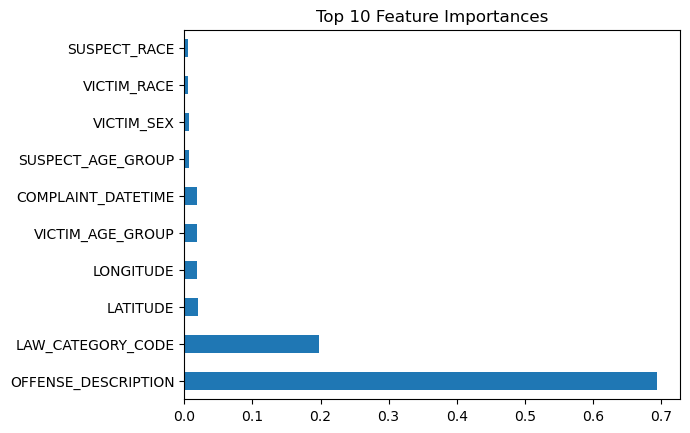

In [826]:

feature_importances = pd.Series(rf_classifier.feature_importances_, index=X_train.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances")
plt.show()


In [827]:


# Scale the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

log_reg_model = LogisticRegression(penalty='l2', C=1.0, solver='liblinear', random_state=42)
log_reg_model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [829]:


param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42, warm_start=True), param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

print(f"Best Parameters: {grid_search.best_params_}")

Best Parameters: {'max_depth': 30, 'n_estimators': 200}


In [830]:
# Train the final model with the best hyperparameters
final_model = RandomForestClassifier(max_depth=30, n_estimators=200, random_state=42)
final_model.fit(X_train_scaled, y_train)

# Scale the test data
X_test_scaled = scaler.transform(X_test)

# Make predictions
y_pred = final_model.predict(X_test_scaled)

# Evaluate the final model
from sklearn.metrics import classification_report, accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Final Model Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))


Final Model Accuracy: 1.00
              precision    recall  f1-score   support

           0       0.94      0.81      0.87        42
           1       0.99      1.00      1.00      5874
           2       1.00      0.94      0.97       367
           3       0.99      1.00      1.00      2133
           4       1.00      0.55      0.71        11
           5       1.00      1.00      1.00      7198

    accuracy                           1.00     15625
   macro avg       0.99      0.88      0.92     15625
weighted avg       1.00      1.00      1.00     15625



In [832]:


importances = final_model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

for i in sorted_indices:
    print(f"Feature: {X.columns[i]}, Importance: {importances[i]}")

Feature: OFFENSE_DESCRIPTION, Importance: 0.6986245676371522
Feature: LAW_CATEGORY_CODE, Importance: 0.19266682463070003
Feature: LATITUDE, Importance: 0.02006151766901264
Feature: VICTIM_AGE_GROUP, Importance: 0.018994909281371118
Feature: LONGITUDE, Importance: 0.018529889075082767
Feature: COMPLAINT_DATETIME, Importance: 0.01789542398526329
Feature: SUSPECT_AGE_GROUP, Importance: 0.007222103648186255
Feature: VICTIM_SEX, Importance: 0.006797801420547079
Feature: VICTIM_RACE, Importance: 0.005870260822484524
Feature: SUSPECT_RACE, Importance: 0.005403109027693273
Feature: SUSPECT_SEX, Importance: 0.004340942588365511
Feature: BOROUGH_NAME, Importance: 0.0035926502141412097


In [833]:

joblib.dump(final_model, 'random_forest_model.pkl')

['random_forest_model.pkl']